In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib.pylab as pylab
import imageio
import scipy.fftpack as fftpck
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc
#from scipy.fftpack import dct

In [3]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams['font.size'] = '13'
pylab.rcParams['figure.figsize'] = (15, 8)

In [4]:
im = imageio.imread("lena.pgm").astype(float)

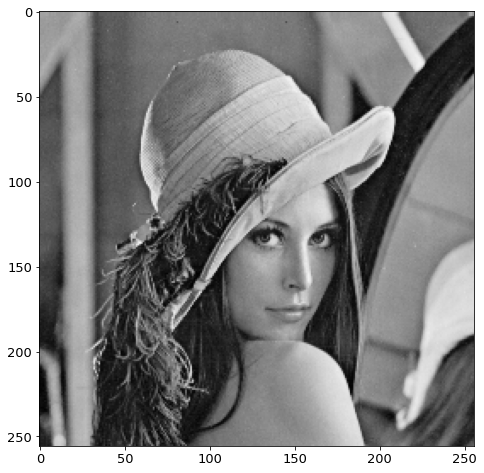

In [5]:
f = plt.figure()
plt.imshow(im,cmap='gray')

In [6]:
def dct2(a):
    return fftpck.dct(fftpck.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return fftpck.idct(fftpck.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [7]:
n = 8

In [8]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:n]:
    for j in r_[:imsize[1]:n]:
        dct[i:(i+n),j:(j+n)] = dct2( im[i:(i+n),j:(j+n)] )

In [9]:
# Display entire DCT
ddct = do_dct(im, 16)
plt.figure()
plt.imshow(ddct,cmap='gray',vmax = np.max(ddct)*0.01,vmin = 0)
plt.title( "8x8     DCTs of the image")

NameError: name 'do_dct' is not defined

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

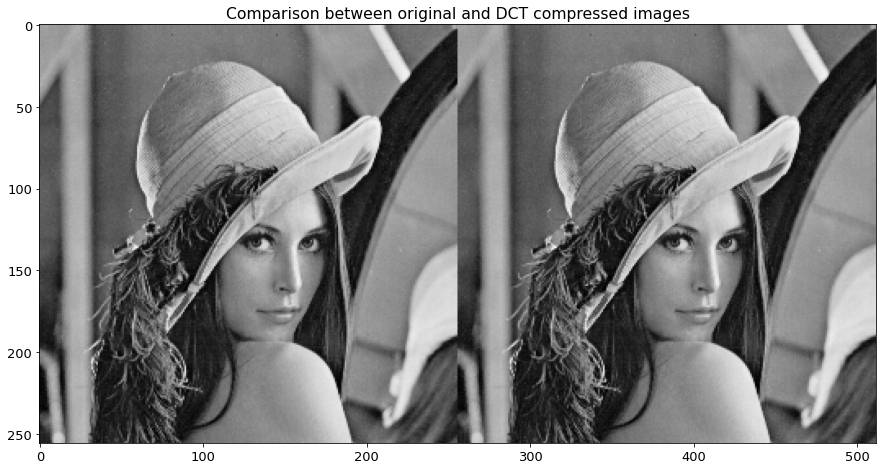

In [ ]:
plt.figure()
plt.imshow( np.hstack( (im, undo_dct(ddct,16, imsize)) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

Keeping only 11.27777099609375 of the DCT coefficients


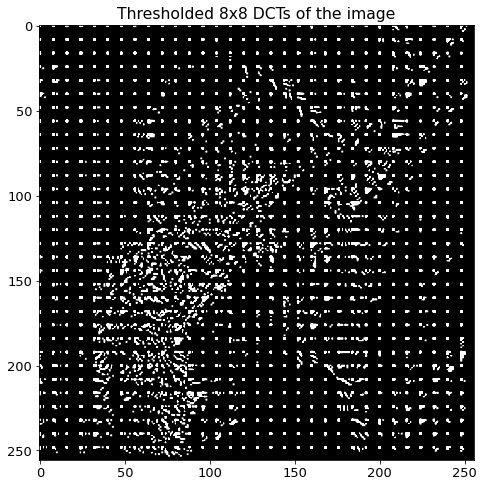

In [ ]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print (f"Keeping only {percent_nonzeros*100.0} of the DCT coefficients")

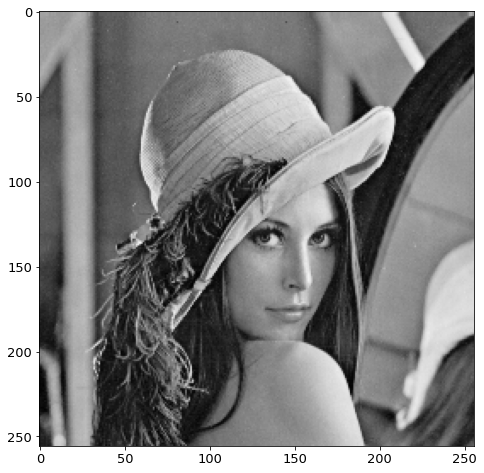

In [11]:
im = imageio.imread("lena.pgm").astype(float)

plt.imshow(im,cmap='gray')
plt.show()

def dct2(a):
    return fftpck.dct(fftpck.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return fftpck.idct(fftpck.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

def do_dct(img, n):
    imsize = img.shape
    dct = np.zeros(imsize)

    for i in r_[:imsize[0]:n]:
        for j in r_[:imsize[1]:n]:
            dct[i:(i+n),j:(j+n)] = dct2( img[i:(i+n),j:(j+n)] )
    
    return dct

def undo_dct(dct, n, imsize):
    
    im_dct = np.zeros(imsize)

    for i in r_[:imsize[0]:n]:
        for j in r_[:imsize[1]:n]:
            im_dct[i:(i+n),j:(j+n)] = idct2(dct[i:(i+n),j:(j+n)] )
    
    return im_dct

n = 8

imsize = im.shape
ddct = do_dct(im, n)

In [31]:
thresh = 0.01
dct_thresh = ddct * (abs(ddct) >= (thresh*np.max(ddct)))
percent_nonzeros = np.sum( dct_thresh != 0.0 ) / dct_thresh.shape[0]**2

print (f"Keeping only {percent_nonzeros} of the DCT coefficients")

Keeping only 0.133453369140625 of the DCT coefficients


In [19]:
dct_thresh.shape[0]**2

65536

In [14]:
ddct

array([[ 1.27287500e+03,  5.52941969e+00, -7.31658763e+00, ...,
         4.90901711e+00, -7.38170391e-01, -2.00886558e+00],
       [ 1.48977208e+01,  4.14548674e+00, -4.42755401e+00, ...,
         6.57032346e+00,  7.16676723e+00, -1.64898694e+00],
       [ 1.68443869e+00,  1.67204576e+00,  2.43718434e-01, ...,
        -3.22726500e+00, -3.96446609e+00,  1.18345214e+00],
       ...,
       [-5.55958952e-01, -6.30948688e+00, -1.15621658e-01, ...,
        -4.39756959e+00,  2.11998440e+00, -9.85070105e-01],
       [-1.45628510e+00, -8.59398672e-01,  2.78661165e+00, ...,
         4.84052839e+00, -1.32430105e+00, -3.99912352e+00],
       [-8.91470212e+00,  2.18859184e+00, -2.41271882e+00, ...,
         1.37881480e+00,  3.48311034e+00,  1.34404924e+00]])

In [15]:
(abs(ddct) >= (thresh*np.max(ddct)))

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])